# <h1 style='color: darkblue; font-size: 30px;'>Data Science - AluraCare Dimensionality Project</h1>

<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid darkblue;'>

# <font color='darkblue' style='font-size: 10;'>The project</font>

### <font color='darkblue' style='font-size: 20;'>Description:</font>

This project aims to build a machine learning model to reduce the number of tests needed to diagnose a specific type of cancer, dealing with high dimensional data. 

This is a fictitious data set created from the Breast Cancer Wisconsin (Diagnostic) Data Set

<hr style = 'border: 1px solid darkblue;'>

# <font color='darkblue' style='font-size: 20;'>About the dataset</font>

### <font color='darkblue' style='font-size: 20;'>Data</font>

The dataset consists of 569 data points stored as rows with 35 columns, where 33 columns are about exams

* **id:** unique pacient identifier
* **diagnostico:** test diagnosis, where 'M' is malignant cancer type and 'B' is benign
* **exames_1 until exames_33:** values of each respective exam

<hr style = 'border: 1px solid darkblue;'>

# <font color='darkblue' style='font-size: 20;'>Preparation</font>
<hr style = 'border: 1px solid darkblue;'>

### <font color='darkblue' style='font-size: 20;'>Importing the required libraries</font>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### <font color='darkblue' style='font-size: 20;'>Reading the dataset</font>

In [3]:
df = pd.read_csv('data\\exames.csv')

### <font color='darkblue' style='font-size: 20;'>Visualizating the dataset</font> 

In [4]:
df.head()

,id,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,...,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32,exame_33
0,842302,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.3001,...,184.60,2019.0,0.1622,0.6656,0.7119,0.786,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.0869,...,158.80,1956.0,0.1238,0.1866,0.2416,0.786,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.1974,...,152.50,1709.0,0.1444,0.4245,0.4504,0.786,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.2414,...,98.87,567.7,0.2098,0.8663,0.6869,0.786,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.1980,...,152.20,1575.0,0.1374,0.2050,0.4000,0.786,0.1625,0.2364,0.07678,0.854454


### <font color='darkblue' style='font-size: 20;'>Verifying the size of the dataset</font> 

In [5]:
df.shape

(569, 35)

### <font color='darkblue' style='font-size: 20;'>Analyzing descriptive statistics</font> 

In [6]:
df.describe()

,id,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,exame_9,...,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32,exame_33
count,5.690000e+02,569.000000,569.000000,569.000000,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,5.690000e+02,569.000000,569.000000,569.000000,150.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,1.037800e+02,654.889104,0.096360,0.104341,0.088799,0.048919,...,107.261213,880.583128,0.132369,0.254265,0.272188,7.860000e-01,0.114606,0.290076,0.083946,0.490452
std,1.250206e+08,3.524049,4.301036,24.298981,7.538380e-13,351.914129,0.014064,0.052813,0.079720,0.038803,...,33.602542,569.356993,0.022832,0.157336,0.208624,1.333440e-15,0.065732,0.061867,0.018061,0.295748
min,8.670000e+03,6.981000,9.710000,43.790000,1.037800e+02,143.500000,0.052630,0.019380,0.000000,0.000000,...,50.410000,185.200000,0.071170,0.027290,0.000000,7.860000e-01,0.000000,0.156500,0.055040,0.008199
25%,8.692180e+05,11.700000,16.170000,75.170000,1.037800e+02,420.300000,0.086370,0.064920,0.029560,0.020310,...,84.110000,515.300000,0.116600,0.147200,0.114500,7.860000e-01,0.064930,0.250400,0.071460,0.209129
50%,9.060240e+05,13.370000,18.840000,86.240000,1.037800e+02,551.100000,0.095870,0.092630,0.061540,0.033500,...,97.660000,686.500000,0.131300,0.211900,0.226700,7.860000e-01,0.099930,0.282200,0.080040,0.472064
75%,8.813129e+06,15.780000,21.800000,104.100000,1.037800e+02,782.700000,0.105300,0.130400,0.130700,0.074000,...,125.400000,1084.000000,0.146000,0.339100,0.382900,7.860000e-01,0.161400,0.317900,0.092080,0.780266
max,9.113205e+08,28.110000,39.280000,188.500000,1.037800e+02,2501.000000,0.163400,0.345400,0.426800,0.201200,...,251.200000,4254.000000,0.222600,1.058000,1.252000,7.860000e-01,0.291000,0.663800,0.207500,0.995380


### <font color='darkblue' style='font-size: 20;'>Checking if that there are no non-null values in the data</font> 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 35 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           569 non-null    int64  
 1   diagnostico  569 non-null    object 
 2   exame_1      569 non-null    float64
 3   exame_2      569 non-null    float64
 4   exame_3      569 non-null    float64
 5   exame_4      569 non-null    float64
 6   exame_5      569 non-null    float64
 7   exame_6      569 non-null    float64
 8   exame_7      569 non-null    float64
 9   exame_8      569 non-null    float64
 10  exame_9      569 non-null    float64
 11  exame_10     569 non-null    float64
 12  exame_11     569 non-null    float64
 13  exame_12     569 non-null    float64
 14  exame_13     569 non-null    float64
 15  exame_14     569 non-null    float64
 16  exame_15     569 non-null    float64
 17  exame_16     569 non-null    float64
 18  exame_17     569 non-null    float64
 19  exame_18

In [8]:
df.isnull().sum()

id               0
diagnostico      0
exame_1          0
exame_2          0
exame_3          0
exame_4          0
exame_5          0
exame_6          0
exame_7          0
exame_8          0
exame_9          0
exame_10         0
exame_11         0
exame_12         0
exame_13         0
exame_14         0
exame_15         0
exame_16         0
exame_17         0
exame_18         0
exame_19         0
exame_20         0
exame_21         0
exame_22         0
exame_23         0
exame_24         0
exame_25         0
exame_26         0
exame_27         0
exame_28         0
exame_29         0
exame_30         0
exame_31         0
exame_32         0
exame_33       419
dtype: int64

In [10]:
419/df.shape[0]

0.7363796133567663

73% of the data in the 'exam_33' column is null, so the best approach is to exclude this column

### <font color='darkblue' style='font-size: 20;'>Drop column</font> 

In [11]:
df.drop(columns=['exame_33'], inplace=True)

# <font color='darkblue' style='font-size: 20;'>Building the model</font>
<hr style = 'border: 1px solid darkblue;'>

### <font color='darkblue' style='font-size: 20;'>Random Forest</font> 

In [13]:
from sklearn.model_selection import train_test_split
from numpy import random

SEED = 123143
random.seed(SEED)

X = df.drop(columns=['id', 'diagnostico'])
Y = df['diagnostico']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = SEED)

In [14]:
from sklearn.ensemble import RandomForestClassifier as RFC

rfc = RFC(n_estimators = 100)
rfc.fit(x_train, y_train)
print("Classification result %.2f%%" % (rfc.score(x_test, y_test)* 100))

Classification result 91.81%


In [15]:
from sklearn.dummy import DummyClassifier as DC

SEED = 123143
random.seed(SEED)

dc = DC(strategy='most_frequent')
dc.fit(x_train, y_train)
print("Dummy classification result %.2f%%" % (dc.score(x_test, y_test)* 100))

Dummy classification result 66.67%


Therefore, we know that an innocent classifier, which always "guesses" the same value, doesn't even come close to the accuracy we achieved with Random Forest, legitimizing it as a good classifier. So we will use the 91.81% as the basis for our dimensionality reduction process.

# <font color='darkblue' style='font-size: 20;'>Processing</font>
<hr style = 'border: 1px solid darkblue;'>

### <font color='darkblue' style='font-size: 20;'>Exploratory Data Analysis</font> 

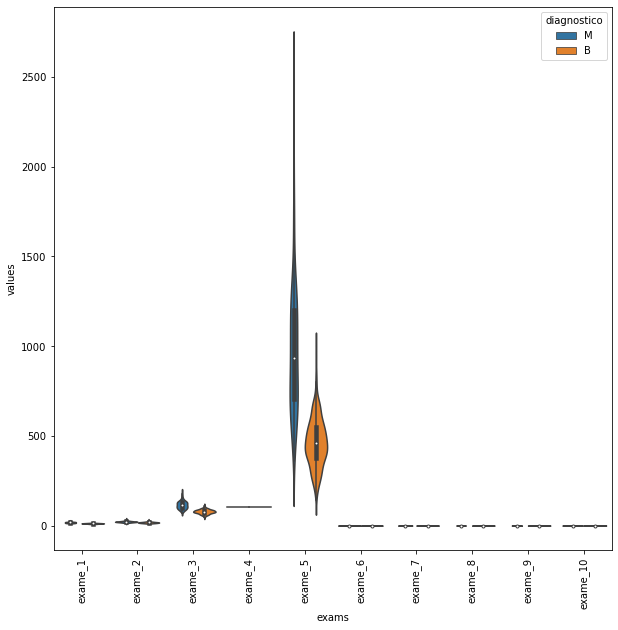

In [19]:
df_plot = pd.concat([Y, X.iloc[:,0:10]], axis=1)
df_plot = pd.melt(df_plot, 
                  id_vars='diagnostico', 
                  var_name='exams',
                  value_name='values')

plt.figure(figsize=(10,10))
sns.violinplot(x='exams',
               y='values',
               hue='diagnostico',
               data=df_plot)
plt.xticks(rotation=90)
plt.show()

#### <font color='darkblue' style='font-size: 20;'>Standard Scaler</font> 

In [20]:
from sklearn.preprocessing import StandardScaler as SC

sc = SC()
sc.fit(X)
X_norm = sc.transform(X)
X_norm = pd.DataFrame(data=X_norm,
                      columns=X.keys())
X_norm

,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,...,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32
0,1.097064,-2.073335,1.269934,1.421085e-14,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,...,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,1.110223e-16,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.421085e-14,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,...,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.110223e-16,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.421085e-14,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,...,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.110223e-16,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,1.421085e-14,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,...,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,1.110223e-16,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.421085e-14,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,...,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,1.110223e-16,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,1.421085e-14,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,...,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.110223e-16,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.421085e-14,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,...,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,1.110223e-16,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,1.421085e-14,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,...,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,1.110223e-16,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.421085e-14,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,...,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,1.110223e-16,2.289985,1.919083,2.219635


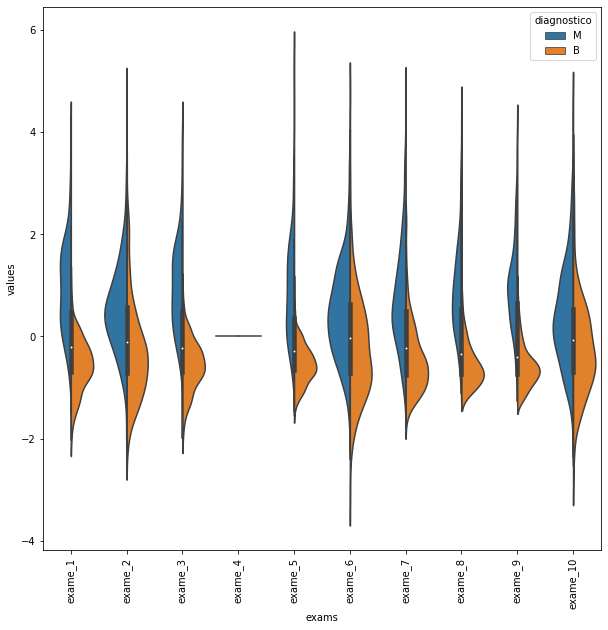

In [21]:
df_plot = pd.concat([Y, X_norm.iloc[:,0:10]], axis=1)
df_plot = pd.melt(df_plot, 
                  id_vars='diagnostico', 
                  var_name='exams',
                  value_name='values')

plt.figure(figsize=(10,10))
sns.violinplot(x='exams',
               y='values',
               hue='diagnostico',
               data=df_plot, 
               split=True)
plt.xticks(rotation=90)
plt.show()

When we look specifically at "exam_2", we notice that the highest point of the orange curve is relatively far away from the highest point of the blue curve. This means that this is a good exam to differentiate between malignant and benign, unlike "exam_6" where the highest points of each curve are quite close, although the orange curve has a slightly less wavy shape.

In "scan_5", we have a very sharp orange curve, while the blue curve is more level and distributed

And "exam_4" seems to have constant values

In [22]:
X_norm['exame_4']

0      1.421085e-14
1      1.421085e-14
2      1.421085e-14
3      1.421085e-14
4      1.421085e-14
           ...     
564    1.421085e-14
565    1.421085e-14
566    1.421085e-14
567    1.421085e-14
568    1.421085e-14
Name: exame_4, Length: 569, dtype: float64

The 'exam_4' column has a constant value, so it does not help the classification and can be deleted

In [23]:
def violin_chart(valores_exame, inicio, fim):
    df_plot = pd.concat([Y, X_norm.iloc[:,inicio:fim]], axis=1)
    df_plot = pd.melt(df_plot, 
                      id_vars='diagnostico', 
                      var_name='exams',
                      value_name='values')

    plt.figure(figsize=(10,10))
    sns.violinplot(x='exams',
                   y='values',
                   hue='diagnostico',
                   data=df_plot, 
                   split=True)
    plt.xticks(rotation=90)
    plt.show()

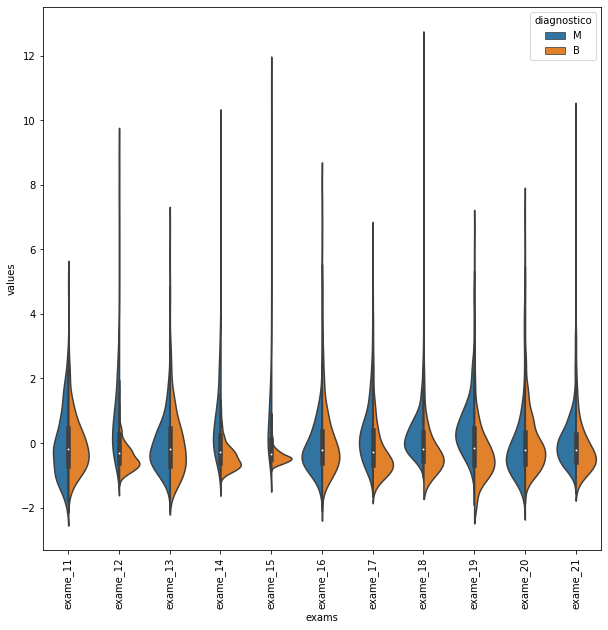

In [24]:
violin_chart(X_norm, 10, 21)

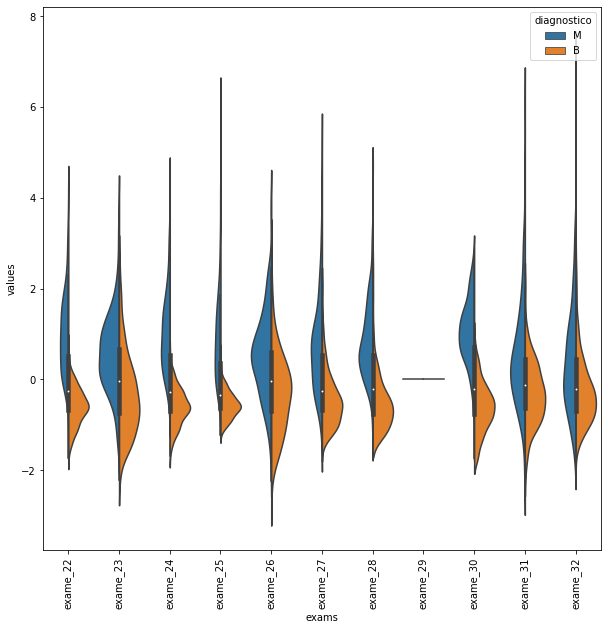

In [25]:
violin_chart(X_norm, 21, 32)

The column 'exam_29' can also be removed

In [26]:
X_norm_v2 = X_norm.drop(columns=['exame_4', 'exame_29'])

### <font color='darkblue' style='font-size: 20;'>New Random Forest Test</font> 

In [27]:
def classificar(valores_exame):
    SEED = 1234
    random.seed(SEED)
    x_train, x_test, y_train, y_test = train_test_split(valores_exame, Y, test_size = 0.3, random_state = SEED)
    rfc = RFC(n_estimators = 100)
    rfc.fit(x_train, y_train)
    print("Classification result %.2f%%" % (rfc.score(x_test, y_test)* 100))

In [28]:
classificar(X_norm_v2)

Classification result 93.57%


With the removal of the constants (the reduction of 2 dimensions), we had a small increase in the accuracy of our classifier compared to the baseline we defined earlier.

#### <font color='darkblue' style='font-size: 20;'>Correlation</font> 

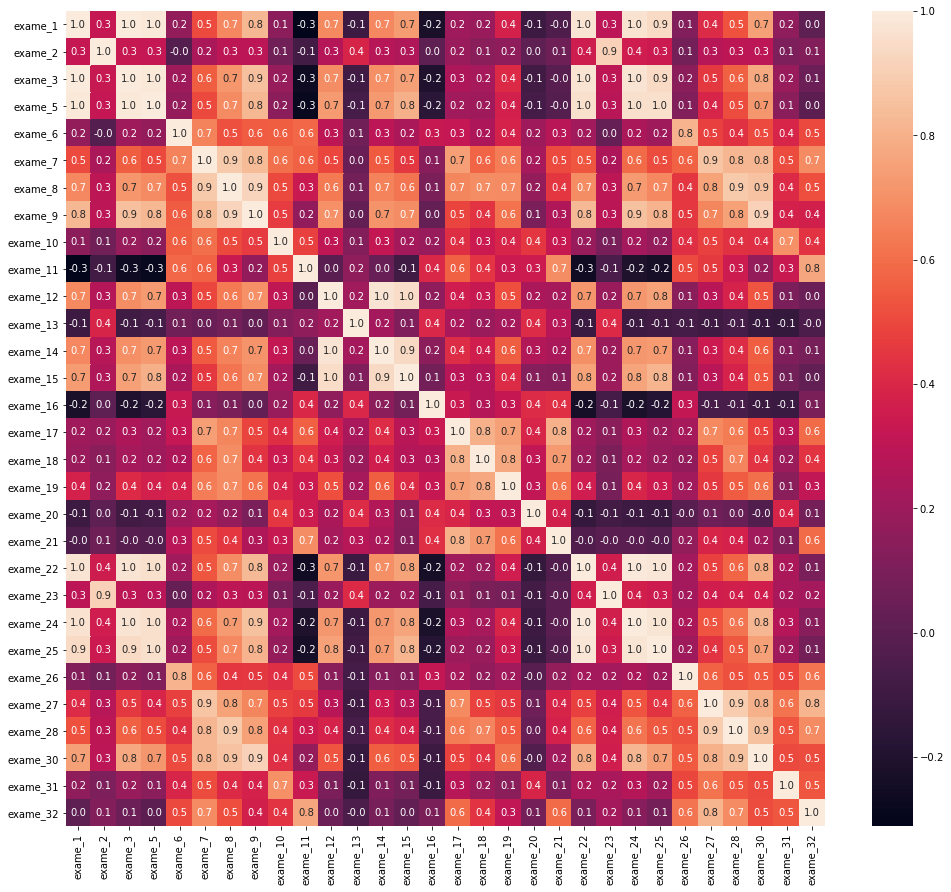

In [29]:
corr = X_norm_v2.corr()
plt.figure(figsize=(17,15))
sns.heatmap(corr,
            annot=True,
            fmt='.1f')
plt.show()

In [30]:
corr_v1 = corr[corr>0.99]
corr_v1

,exame_1,exame_2,exame_3,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,...,exame_22,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
exame_1,1.000000,NaN,0.997855,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_2,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_3,0.997855,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_5,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_6,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_7,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_8,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
corr_v2 = corr_v1.sum()
corr_v2

exame_1     1.997855
exame_2     1.000000
exame_3     1.997855
exame_5     1.000000
exame_6     1.000000
exame_7     1.000000
exame_8     1.000000
exame_9     1.000000
exame_10    1.000000
exame_11    1.000000
exame_12    1.000000
exame_13    1.000000
exame_14    1.000000
exame_15    1.000000
exame_16    1.000000
exame_17    1.000000
exame_18    1.000000
exame_19    1.000000
exame_20    1.000000
exame_21    1.000000
exame_22    1.993708
exame_23    1.000000
exame_24    1.993708
exame_25    1.000000
exame_26    1.000000
exame_27    1.000000
exame_28    1.000000
exame_30    1.000000
exame_31    1.000000
exame_32    1.000000
dtype: float64

Columns with values greater than 1 are highly correlated

In [32]:
corr_v3 = corr_v2[corr_v2>1]
corr_v3

exame_1     1.997855
exame_3     1.997855
exame_22    1.993708
exame_24    1.993708
dtype: float64

In [33]:
X_norm_v3 = X_norm_v2.drop(columns=corr_v3.keys())
X_norm_v3.head()

,exame_2,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,exame_12,exame_13,...,exame_20,exame_21,exame_23,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
0,-2.073335,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,-0.565265,...,1.148757,0.907083,-1.359293,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,-0.353632,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,-0.876244,...,-0.805450,-0.099444,-0.369203,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,0.456187,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,-0.780083,...,0.237036,0.293559,-0.023974,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,0.253732,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,-0.110409,...,4.732680,2.047511,0.133984,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,-1.151816,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,-0.790244,...,-0.361092,0.499328,-1.466770,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [34]:
classificar(X_norm_v3)

Classification result 92.98%


We got a slightly worse result than we had been getting, but why? We found out which variables were correlated and excluded all of them, but that's not really what we should have done. Looking again at our correlation matrix, we can see that the features "exam_1" and "exam_3" are fully correlated, as are "exam_22" and "exam_24". Therefore, we will remove only one feature from each of these pairs - in this case, "exam_3" and "exam_24".

In [35]:
X_norm_v4 = X_norm_v2.drop(columns=['exame_3', 'exame_24'])
classificar(X_norm_v4)

Classification result 95.32%


When we need to bury the model, identifying the variables with a high correlation helps us to better understand the problem we are solving, but when we go to train this model, these same variables can have a higher weight, biasing our training, to avoid this, the highly correlated variables are excluded.

Quanto mais alta a correlação entre as variáveis tem-se informação duplicada, o que pode contribuir mais com viés no modelo de classificação.

### <font color='darkblue' style='font-size: 20;'>SelectKBest</font> 

In [36]:
from sklearn.feature_selection import SelectKBest as SKB
from sklearn.feature_selection import chi2

k_best = SKB(chi2, k = 5)

In [37]:
SEED = 1234
random.seed(SEED)

#does not work with negative values, need to "denormalize"
X_v5 = X.drop(columns=['exame_3', 'exame_4', 'exame_24', 'exame_29'])


x_train, x_test, y_train, y_test = train_test_split(X_v5, Y, test_size = 0.3, random_state = SEED)

k_best.fit(x_train, y_train)
k_best_train = k_best.transform(x_train)
k_best_test = k_best.transform(x_test)

In [38]:
classificador = RFC(n_estimators=100, random_state=1234)
classificador.fit(k_best_train, y_train)
y_pred = classificador.predict(k_best_test)
print("Classification result %.2f%%" % (classificador.score(k_best_test, y_test)* 100))

Classification result 92.40%


In [39]:
5/33

0.15151515151515152

The dataset was reduced to 15% while maintaining high accuracy

#### <font color='darkblue' style='font-size: 20;'>Confusion Matrix</font> 

In [40]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)

[Text(0.5, 38.5, 'Prediction'), Text(56.5, 0.5, 'Real')]

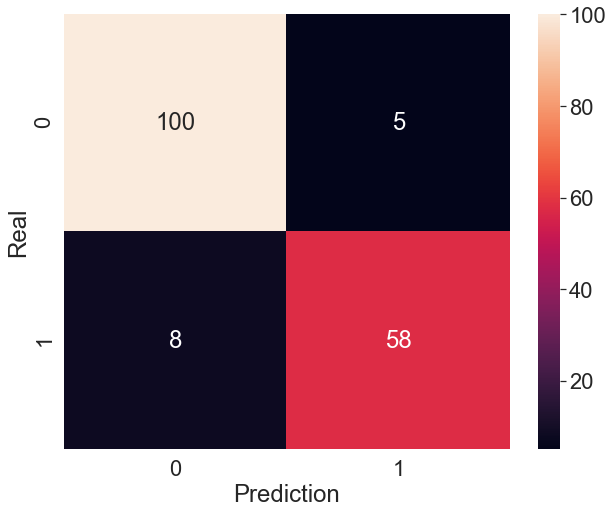

In [41]:
plt.figure(figsize=(10,8))
sns.set(font_scale=2)
sns.heatmap(conf_matrix, annot = True, fmt = "d").set(xlabel = "Prediction", ylabel = "Real")

#### <font color='darkblue' style='font-size: 20;'>RFE - Recursive Feature Elimination</font> 

Classification result 90.06%


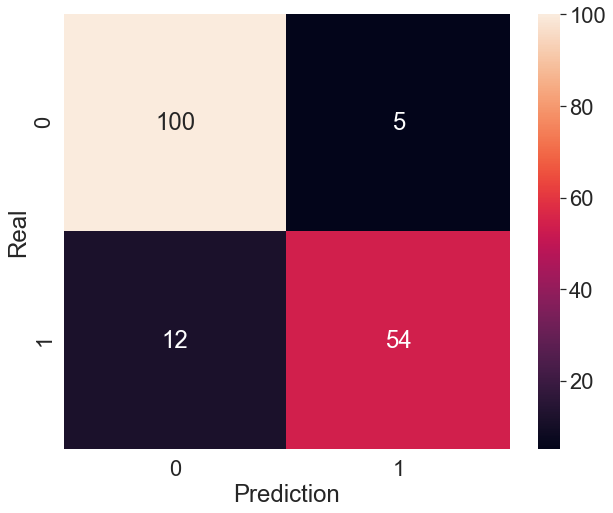

In [42]:
from sklearn.feature_selection import RFE

SEED = 1234
random.seed(SEED)

x_train, x_test, y_train, y_test = train_test_split(X_v5, Y, test_size = 0.3, random_state = SEED)

classificador = RFC(n_estimators=100, random_state=1234)
classificador.fit(x_train, y_train)

rfe = RFE(estimator=classificador, n_features_to_select=5, step=1)
rfe.fit(x_train, y_train)

rfe_train = rfe.transform(x_train)
rfe_test = rfe.transform(x_test)

classificador.fit(rfe_train, y_train)
y_pred_rfe = classificador.predict(rfe_test)

conf_matrix = confusion_matrix(y_test, y_pred_rfe)
plt.figure(figsize=(10,8))
sns.set(font_scale=2)
sns.heatmap(conf_matrix, annot = True, fmt = "d").set(xlabel = "Prediction", ylabel = "Real")

print("Classification result %.2f%%" % (classificador.score(rfe_test, y_test)* 100))

#### <font color='darkblue' style='font-size: 20;'>RFE Cross Validation</font> 

Classification result 92.98%


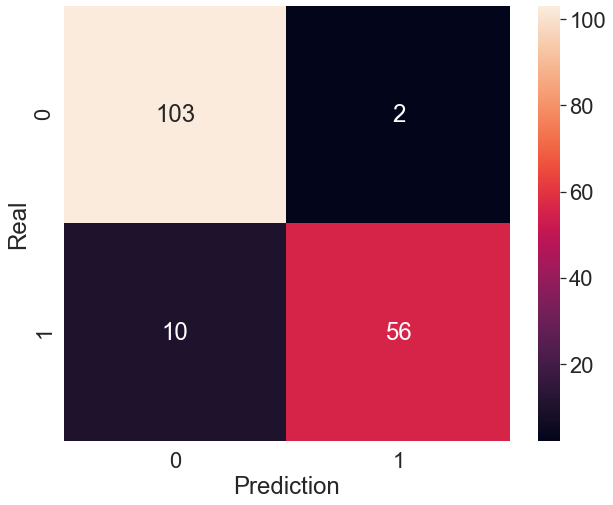

In [43]:
from sklearn.feature_selection import RFECV

SEED = 1234
random.seed(SEED)

x_train, x_test, y_train, y_test = train_test_split(X_v5,
                                                       Y,
                                                       test_size = 0.3)

classificador = RFC(n_estimators=100, random_state = 1234)
classificador.fit(x_train, y_train)


selecionador_rfecv = RFECV(estimator = classificador, cv = 5, scoring = "accuracy", step = 1)
selecionador_rfecv.fit(x_train, y_train)
treino_rfecv = selecionador_rfecv.transform(x_train)
teste_rfecv = selecionador_rfecv.transform(x_test)
classificador.fit(treino_rfecv, y_train)

matriz_confusao = confusion_matrix(y_test, classificador.predict(teste_rfecv))
plt.figure(figsize = (10, 8))
sns.set(font_scale = 2)
sns.heatmap(matriz_confusao, annot = True, fmt = "d").set(xlabel = "Prediction", ylabel = "Real")

print("Classification result %.2f%%" % (classificador.score(teste_rfecv, y_test)* 100))


In [44]:
selecionador_rfecv.n_features_

26

In [45]:
selecionador_rfecv.grid_scores_

array([[0.85      , 0.8875    , 0.8625    , 0.89873418, 0.84810127],
       [0.9375    , 0.9375    , 0.9625    , 0.93670886, 0.88607595],
       [0.925     , 0.95      , 0.95      , 0.97468354, 0.93670886],
       [0.9125    , 0.95      , 0.9625    , 0.96202532, 0.93670886],
       [0.9375    , 0.9375    , 0.9625    , 0.98734177, 0.93670886],
       [0.9375    , 0.95      , 0.9625    , 0.96202532, 0.93670886],
       [0.9375    , 0.95      , 0.9625    , 0.97468354, 0.93670886],
       [0.925     , 0.975     , 0.975     , 0.98734177, 0.94936709],
       [0.9125    , 0.9625    , 0.95      , 0.97468354, 0.93670886],
       [0.925     , 0.9625    , 0.975     , 0.96202532, 0.93670886],
       [0.9375    , 0.975     , 0.9625    , 0.98734177, 0.93670886],
       [0.95      , 0.9625    , 0.9625    , 0.98734177, 0.94936709],
       [0.9625    , 0.95      , 0.975     , 0.98734177, 0.94936709],
       [0.95      , 0.9625    , 0.975     , 0.98734177, 0.93670886],
       [0.95      , 0.95      , 0.

In [46]:
x_train.columns[selecionador_rfecv.support_]

Index(['exame_1', 'exame_2', 'exame_5', 'exame_6', 'exame_7', 'exame_8',
       'exame_9', 'exame_10', 'exame_12', 'exame_13', 'exame_14', 'exame_15',
       'exame_16', 'exame_18', 'exame_19', 'exame_20', 'exame_21', 'exame_22',
       'exame_23', 'exame_25', 'exame_26', 'exame_27', 'exame_28', 'exame_30',
       'exame_31', 'exame_32'],
      dtype='object')

<function matplotlib.pyplot.show(close=None, block=None)>

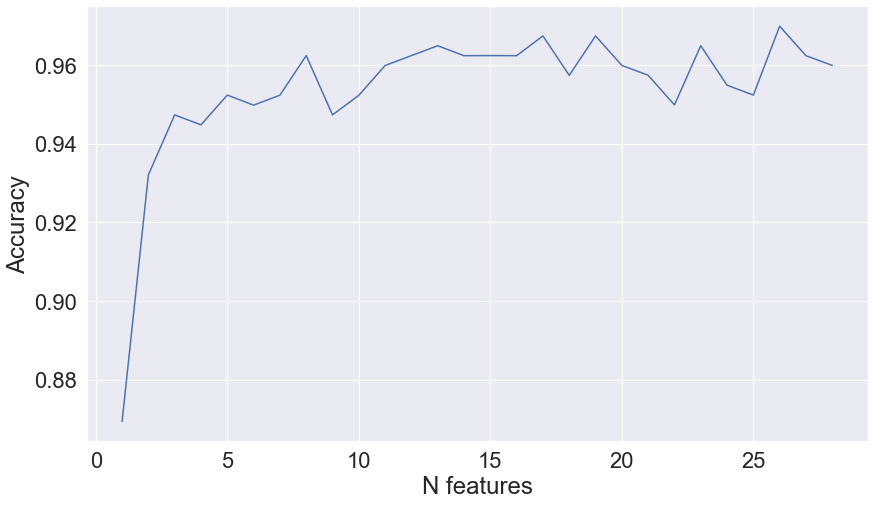

In [47]:
plt.figure(figsize=(14, 8))
plt.xlabel("N features")
plt.ylabel("Accuracy")

plt.plot(range(1, len(selecionador_rfecv.cv_results_['mean_test_score']) + 1), selecionador_rfecv.cv_results_['mean_test_score'])
plt.show

Classification result 87.13%


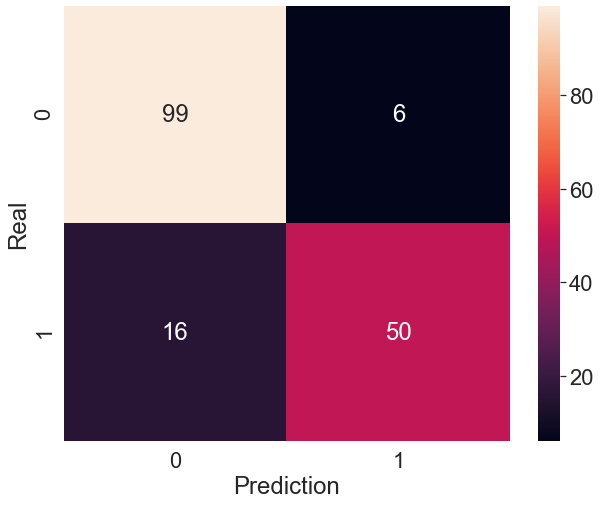

In [48]:
SEED = 1234
random.seed(SEED)

x_train, x_test, y_train, y_test = train_test_split(X_v5, Y, test_size = 0.3, random_state = SEED)

classificador = RFC(n_estimators=100, random_state=1234)
classificador.fit(x_train, y_train)

rfe = RFE(estimator=classificador, n_features_to_select=2, step=1)
rfe.fit(x_train, y_train)

rfe_train = rfe.transform(x_train)
rfe_test = rfe.transform(x_test)

classificador.fit(rfe_train, y_train)
y_pred_rfe = classificador.predict(rfe_test)

conf_matrix = confusion_matrix(y_test, y_pred_rfe)
plt.figure(figsize=(10,8))
sns.set(font_scale=2)
sns.heatmap(conf_matrix, annot = True, fmt = "d").set(xlabel = "Prediction", ylabel = "Real")

print("Classification result %.2f%%" % (classificador.score(rfe_test, y_test)* 100))

In [49]:
X_v6 = rfe.transform(X_v5)

In [50]:
X_v6.shape

(569, 2)

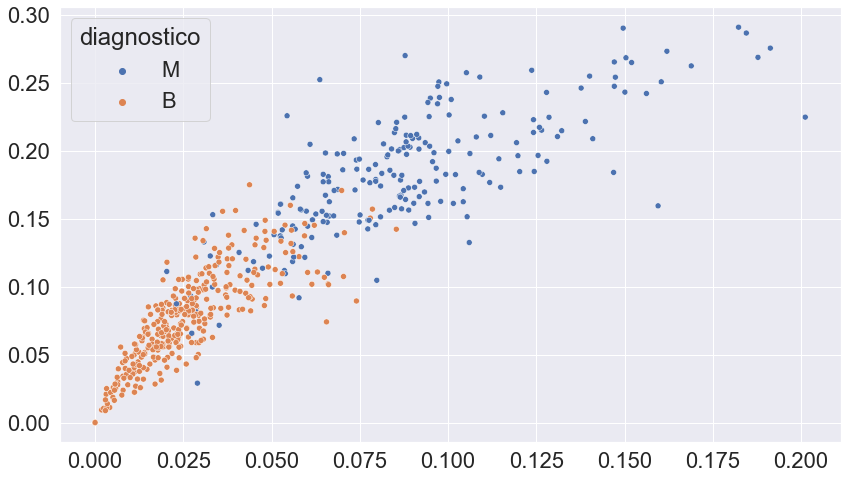

In [51]:
plt.figure(figsize=(14,8))
sns.scatterplot(x=X_v6[:,0],
                y=X_v6[:,1],
                hue=Y)
plt.show()

### <font color='darkblue' style='font-size: 20;'>Dimensionality reduction - 2D plan view</font> 

In [52]:
from sklearn.decomposition import PCA

#One of the techniques we can use to keep as much information as possible in low dimensionality is PCA.
pca = PCA(n_components=2)
X_v7 = pca.fit_transform(X_norm_v4)

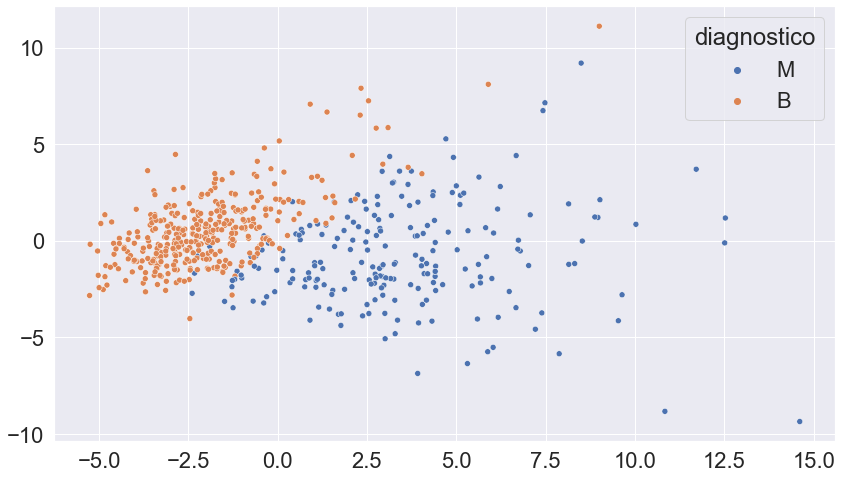

In [53]:
plt.figure(figsize=(14,8))
sns.scatterplot(x=X_v7[:,0],
                y=X_v7[:,1],
                hue=Y)
plt.show()

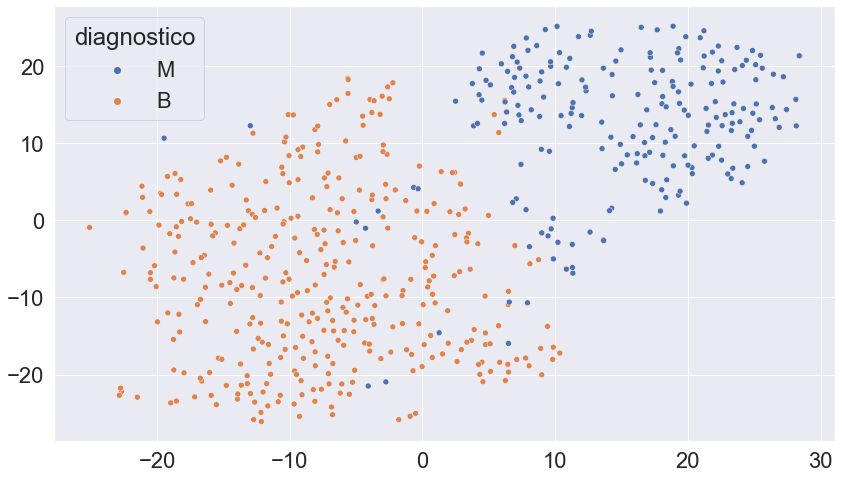

In [54]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
X_v8 = tsne.fit_transform(X_norm_v4)

plt.figure(figsize=(14,8))
sns.scatterplot(x=X_v8[:,0],
                y=X_v8[:,1],
                hue=Y)
plt.show()

These techniques that perform a mathematical transformation on the data before processing it, reducing its dimensions, are rightly called "dimensionality reduction".

The difference between dimensionality reduction and feature selection is that the latter works as a funnel that filters out the main features of an original database.

To generate a plan view, it is best to use techniques that try to preserve as much information as possible in a reduced dimension, such as PCA and T-SNE

<hr style = 'border: 1px solid darkblue;'>